# import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DO - Doctor of Osteopathic Medicine 

In [19]:
import pandas as pd
import numpy as np

DO_path = "/Users/chenhaoyi/JupyterNotebook/SummerProject/County_DO.csv"
df_do = pd.read_csv(DO_path)


df_do_select = df_do[['County','Clinician Count']]
df_do_select.rename(columns  = {'Clinician Count': 'Clinician_Count_DO'}, inplace = True)
df_do_final = df_do_select.sort_values(by = 'County').reset_index(drop = True)
print(df_do_final)

print(df_do_final['Clinician_Count_DO'].describe())

        County  Clinician_Count_DO
0      Alachua                  74
1        Baker                   2
2          Bay                  27
3     Bradford                   1
4      Brevard                 118
..         ...                 ...
62       Union                   0
63     Volusia                  92
64     Wakulla                   2
65      Walton                  16
66  Washington                   0

[67 rows x 2 columns]
count     67.000000
mean      72.164179
std      129.345625
min        0.000000
25%        2.000000
50%       25.000000
75%       74.000000
max      678.000000
Name: Clinician_Count_DO, dtype: float64


Text(0.5, 1.0, '(Clinician_Count_DO)')

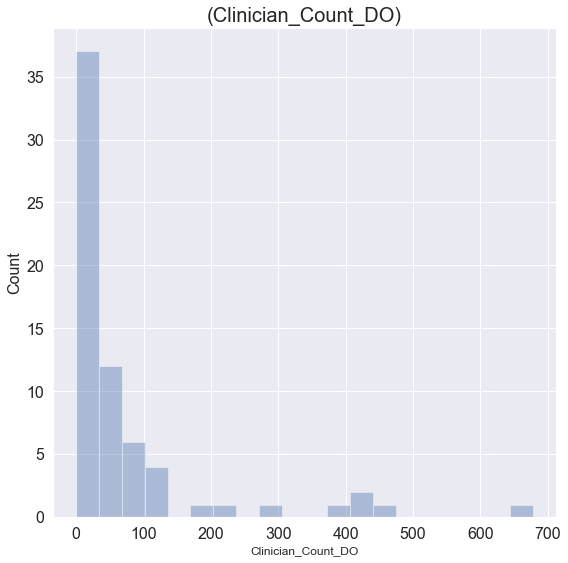

In [22]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (9,9))
sns.distplot(df_do_final['Clinician_Count_DO'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("(Clinician_Count_DO)", fontsize=20)             

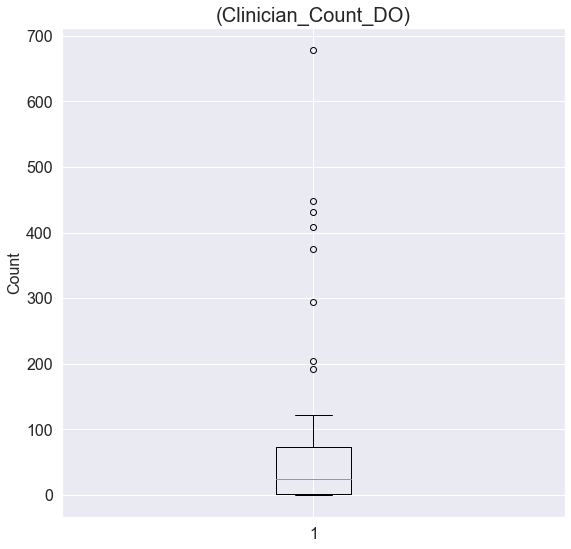

In [17]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (9,9))
plt.boxplot(df_do_final['Clinician_Count_DO'])       
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("(Clinician_Count_DO)", fontsize=20)
plt.show()

In [ ]:
sns.set(style = 'darkgrid')
fig = plt.figure(figsize = (9,9))
plt.plot(df_do_final['Clinician_Count_DO'])       
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("(Clinician_Count_DO)", fontsize=20)
plt.show()

# MD - Doctor of Medicine

In [4]:
import pandas as pd
import numpy as np

MD_path = "/Users/chenhaoyi/JupyterNotebook/SummerProject/County_MD.csv"
df_md = pd.read_csv(MD_path)
df_md_select = df_md[['County','MEASURE_CT']]
df_md_select.rename(columns  = {'MEASURE_CT': 'Clinician_Count_MD'}, inplace = True)
df_md_final = df_md_select.sort_values(by = 'County').reset_index(drop = True)
df_md_final['Clinician_Count_MD'] = df_md_final['Clinician_Count_MD'].apply(lambda x: x.replace(',',''))
df_md_final['Clinician_Count_MD'] = pd.to_numeric(df_md_final['Clinician_Count_MD'])
print(df_md_final)

        County  Clinician_Count_MD
0      Alachua                2225
1        Baker                  17
2          Bay                 347
3     Bradford                  17
4      Brevard                1239
..         ...                 ...
62       Union                   9
63     Volusia                 935
64     Wakulla                  11
65      Walton                  97
66  Washington                  10

[67 rows x 2 columns]


Text(0.5, 1.0, '(Clinician_Count_MD)')

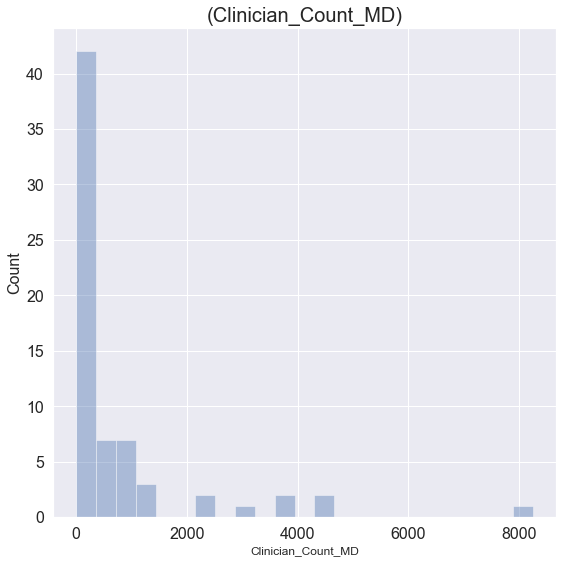

In [5]:
fig = plt.figure(figsize = (9,9))
sns.distplot(df_md_final['Clinician_Count_MD'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("(Clinician_Count_MD)", fontsize=20)             

# Nurse practitioner

In [6]:
import pandas as pd
import numpy as np

nurse_path = "/Users/chenhaoyi/JupyterNotebook/SummerProject/County_Nurse.csv"
df_nurse = pd.read_csv(nurse_path)
df_nurse_select = df_nurse[['County','MEASURE_CT']]
df_nurse_select.rename(columns  = {'MEASURE_CT': 'Nurse_practitioner_Count'}, inplace = True)
df_nurse_final = df_nurse_select.sort_values(by = 'County').reset_index(drop = True)
df_nurse_final['Nurse_practitioner_Count'] = df_nurse_final['Nurse_practitioner_Count'].apply(lambda x: x.replace(',',''))
df_nurse_final['Nurse_practitioner_Count'] = pd.to_numeric(df_nurse_final['Nurse_practitioner_Count'])
print(df_nurse_final)

        County  Nurse_practitioner_Count
0      Alachua                       600
1        Baker                        17
2          Bay                       164
3     Bradford                        18
4      Brevard                       421
..         ...                       ...
62       Union                         7
63     Volusia                       297
64     Wakulla                         9
65      Walton                        37
66  Washington                        17

[67 rows x 2 columns]


Text(0.5, 1.0, '(Nurse_practitioner_Count)')

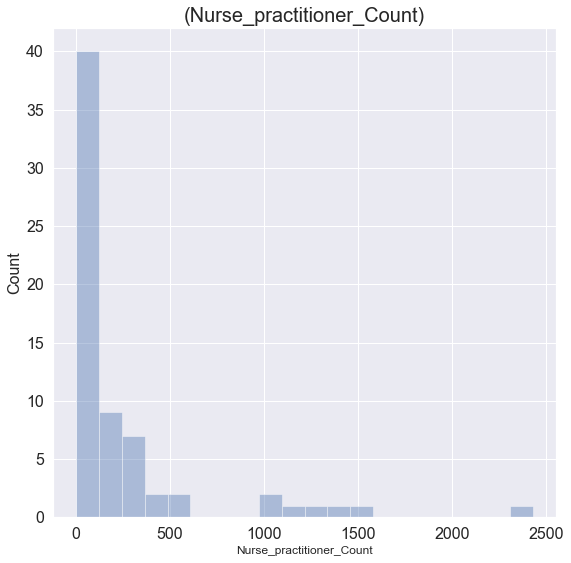

In [7]:
fig = plt.figure(figsize = (9,9))
sns.distplot(df_nurse_final['Nurse_practitioner_Count'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("(Nurse_practitioner_Count)", fontsize=20)             

# hospital beds count per county in Florida

# Total Staffed Bed Capacity

In [24]:
import pandas as pd
import numpy as np
import re

# define a function to rename the county
def transform_name(name):
    name_list = re.split("( |-)", name)
    transform_list = []
    new_name = ""
    
    for i in name_list:
        i = i.capitalize()
        transform_list.append(i)
    
    for i in transform_list:
        new_name = new_name + i
    return new_name


beds_path = "/Users/chenhaoyi/JupyterNotebook/SummerProject/Hospital_Beds_per_county.csv"
name = ['County', 'variable', 'value']
df_beds = pd.read_csv(beds_path, names = name, skiprows = 1)
df_beds_1 = df_beds[df_beds['variable'] == 'Total Staffed Bed Capacity']
df_beds_1 = df_beds_1.sort_values(by = 'County').reset_index(drop = True)
df_beds_1['value'] = df_beds_1['value'].apply(lambda x: int(x))

#df_beds_1['County'] = df_beds_1['County'].apply(lambda x: x.capitalize())
df_beds_1['County'] = df_beds_1['County'].apply(transform_name)

df_beds_1.rename(columns = {'value':"Total Staffed Bed Capacity"}, inplace = True)
df_beds_1 = df_beds_1.drop(columns = 'variable', axis = 1)

print(df_beds_1)

          County  Total Staffed Bed Capacity
0        Alachua                        1664
1          Baker                         625
2            Bay                         523
3        Brevard                        1563
4        Broward                        5879
5        Calhoun                          10
6      Charlotte                         734
7         Citrus                         314
8           Clay                         493
9        Collier                         850
10      Columbia                         144
11        Desoto                          55
12         Duval                        3892
13      Escambia                        1344
14       Flagler                         112
15      Franklin                          15
16       Gadsden                           0
17          Gulf                          20
18        Hardee                          25
19        Hendry                          29
20      Hernando                         703
21     Hig

Text(0.5, 1.0, '(Total Staffed Bed Capacity)')

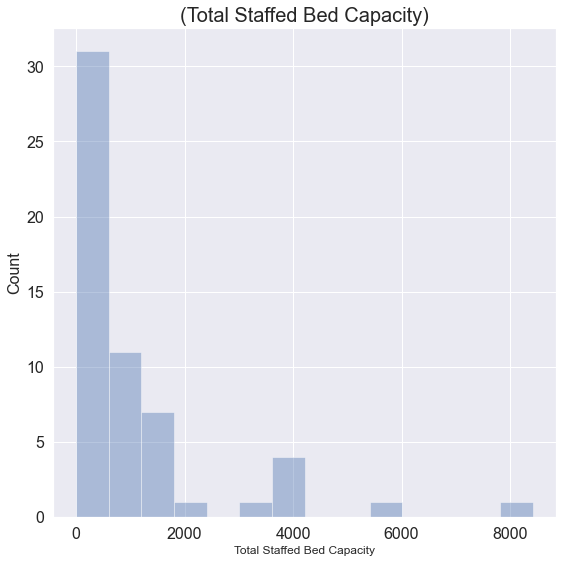

In [9]:
fig = plt.figure(figsize = (9,9))
sns.distplot(df_beds_1['Total Staffed Bed Capacity'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("(Total Staffed Bed Capacity)", fontsize=20)             

# Bed Census

In [10]:
import pandas as pd
import numpy as np
import re

# define a function to rename the county
def transform_name(name):
    name_list = re.split("( |-)", name)
    transform_list = []
    new_name = ""
    
    for i in name_list:
        i = i.capitalize()
        transform_list.append(i)
    
    for i in transform_list:
        new_name = new_name + i
    return new_name

beds_path = "/Users/chenhaoyi/JupyterNotebook/SummerProject/Hospital_Beds_per_county.csv"
name = ['County', 'variable', 'value']
df_beds = pd.read_csv(beds_path, names = name, skiprows = 1)
df_beds_2 = df_beds[df_beds['variable'] == 'Bed Census']
df_beds_2 = df_beds_2.sort_values(by = 'County').reset_index(drop = True)
df_beds_2['value'] = df_beds_2['value'].apply(lambda x: int(x))
df_beds_2['County'] = df_beds_2['County'].apply(transform_name)

df_beds_2.rename(columns = {'value':"Bed Census"}, inplace = True)
df_beds_2 = df_beds_2.drop(columns = 'variable', axis = 1)

print(df_beds_2)

          County  Bed Census
0        Alachua        1397
1          Baker         530
2            Bay         414
3        Brevard        1153
4        Broward        4172
5        Calhoun           7
6      Charlotte         507
7         Citrus         217
8           Clay         447
9        Collier         715
10      Columbia         129
11        Desoto          21
12         Duval        2613
13      Escambia        1000
14       Flagler          87
15      Franklin           2
16       Gadsden           0
17          Gulf           3
18        Hardee          23
19        Hendry          15
20      Hernando         471
21     Highlands         186
22  Hillsborough        2937
23        Holmes           7
24  Indian River         291
25       Jackson          23
26          Lake         649
27           Lee        1476
28          Leon         673
29       Madison           7
30       Manatee         687
31        Marion         798
32        Martin         298
33    Miami-Da

Text(0.5, 1.0, '(Bed Census)')

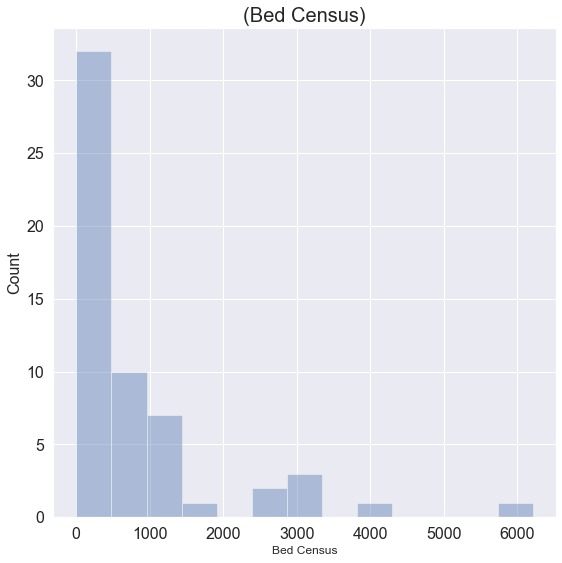

In [11]:
fig = plt.figure(figsize = (9,9))
sns.distplot(df_beds_2['Bed Census'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("(Bed Census)", fontsize=20)             

# Available

In [12]:
import pandas as pd
import numpy as np
import re

# define a function to rename the county
def transform_name(name):
    name_list = re.split("( |-)", name)
    transform_list = []
    new_name = ""
    
    for i in name_list:
        i = i.capitalize()
        transform_list.append(i)
    
    for i in transform_list:
        new_name = new_name + i
    return new_name


beds_path = "/Users/chenhaoyi/JupyterNotebook/SummerProject/Hospital_Beds_per_county.csv"
name = ['County', 'variable', 'value']
df_beds = pd.read_csv(beds_path, names = name, skiprows = 1)
df_beds_3 = df_beds[df_beds['variable'] == 'Available']
df_beds_3 = df_beds_3.sort_values(by = 'County').reset_index(drop = True)
df_beds_3['value'] = df_beds_3['value'].apply(lambda x: int(x))
df_beds_3['County'] = df_beds_3['County'].apply(transform_name)

df_beds_3.rename(columns = {'value':"Available beds"}, inplace = True)
df_beds_3 = df_beds_3.drop(columns = 'variable', axis = 1)


print(df_beds_3)

          County  Available beds
0        Alachua             267
1          Baker              95
2            Bay             109
3        Brevard             410
4        Broward            1707
5        Calhoun               3
6      Charlotte             227
7         Citrus              97
8           Clay              46
9        Collier             135
10      Columbia              15
11        Desoto              34
12         Duval            1279
13      Escambia             344
14       Flagler              25
15      Franklin              13
16       Gadsden               0
17          Gulf              17
18        Hardee               2
19        Hendry              14
20      Hernando             232
21     Highlands              99
22  Hillsborough             856
23        Holmes              13
24  Indian River             162
25       Jackson              58
26          Lake             184
27           Lee             601
28          Leon             213
29       M

Text(0.5, 1.0, '(Available beds)')

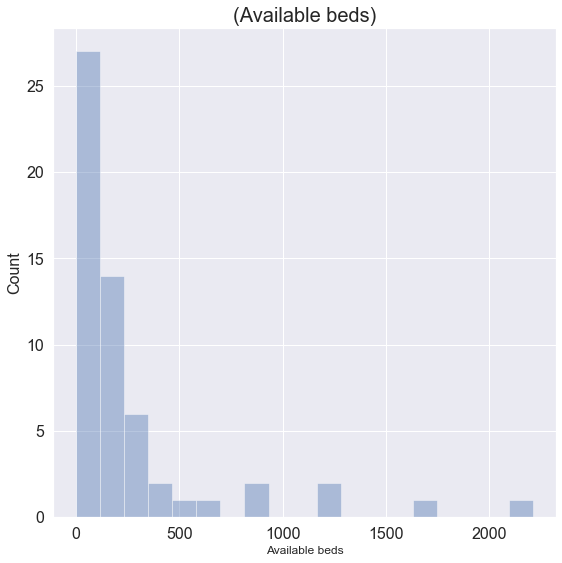

In [13]:
fig = plt.figure(figsize = (9,9))
sns.distplot(df_beds_3['Available beds'], kde = False)          
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("(Available beds)", fontsize=20)             

# generate a dataset containing whole data for medical resource

In [14]:
import pandas as pd

# merge md data and do data
df_medical_resource_merge_1 = pd.merge(df_md_final,df_do_final,on = 'County')

# merge with nurse data
df_medical_resource_merge_2 = pd.merge(df_medical_resource_merge_1,df_nurse_final,on = 'County')

# merge with available beds data
df_medical_resource_merge_3 = pd.merge(df_medical_resource_merge_2,df_beds_3,on = 'County',how = 'left').fillna(value=0)

# merge with bed census
df_medical_resource_merge_4 = pd.merge(df_medical_resource_merge_3,df_beds_2,on = 'County',how = 'left').fillna(value=0)

# merge with Total Staffed Bed Capacity
df_medical_resource_merge_5 = pd.merge(df_medical_resource_merge_4,df_beds_1,on = 'County',how = 'left').fillna(value=0)

print(df_medical_resource_merge_5)

df_medical_resource_merge_5.to_csv('/Users/chenhaoyi/JupyterNotebook/SummerProject/data/medical_resource_dataset/medical_resource.csv', index = False)

        County  Clinician_Count_MD  Clinician_Count_DO  \
0      Alachua                2225                  74   
1        Baker                  17                   2   
2          Bay                 347                  27   
3     Bradford                  17                   1   
4      Brevard                1239                 118   
..         ...                 ...                 ...   
62       Union                   9                   0   
63     Volusia                 935                  92   
64     Wakulla                  11                   2   
65      Walton                  97                  16   
66  Washington                  10                   0   

    Nurse_practitioner_Count  Available beds  Bed Census  \
0                        600           267.0      1397.0   
1                         17            95.0       530.0   
2                        164           109.0       414.0   
3                         18             0.0         0.0   
4  